## Program nr 2
**Barbara Pobiedzińska, Agata Semerjak, Maciej Wieloch**  
Piątek 15:00  
  
Rekurencyjne odwracanie macierzy. Program rezlizowany w języku *Python*.

In [1]:
# import bibliotek
import time
import numpy as np
import json
import matplotlib.pyplot as plt

##### Funkcje pomocnicze

In [2]:
def split(matrix):
    """Funkcja pomocnicza służąca do dzielenia
    macierzy na 4 równe części."""
    global operation_counter

    n = len(matrix)
    m = n // 2
    a = [[0 for j in range(m)] for i in range(m)]
    b = [[0 for j in range(m)] for i in range(m)]
    c = [[0 for j in range(m)] for i in range(m)]
    d = [[0 for j in range(m)] for i in range(m)]
    for i in range(m):
        for j in range(m):
            a[i][j] = matrix[i][j]
            b[i][j] = matrix[i][j + m]
            c[i][j] = matrix[i + m][j]
            d[i][j] = matrix[i + m][j + m]
    return a, b, c, d


def add(matrix1, matrix2):
    """Funkcja pomocnicza do dodawania macierzy dla algorytmu strassena"""
    global operation_counter

    n = len(matrix1)
    result = [[0 for j in range(n)] for i in range(n)]
    for i in range(n):
        for j in range(n):
            result[i][j] = matrix1[i][j] + matrix2[i][j]
            operation_counter += 1
    return result


def sub(matrix1, matrix2):
    """Funkcja pomocnicza do odejmowania macierzy dla algorytmu strassena"""
    global operation_counter

    n = len(matrix1)
    result = [[0 for j in range(n)] for i in range(n)]
    for i in range(n):
        for j in range(n):
            result[i][j] = matrix1[i][j] - matrix2[i][j]
            operation_counter += 1
    return result


def combine(c11, c12, c21, c22):
    """Funkcja pomocnicza do łączenia macierzy wynikowych"""
    if type(c11) == int:
        return [[c11,c12],[c21,c22]]
    n = len(c11)
    m = 2 * n
    result = [[0 for j in range(m)] for i in range(m)]
    for i in range(n):
        for j in range(n):
            result[i][j] = c11[i][j]
            result[i][j + n] = c12[i][j]
            result[i + n][j] = c21[i][j]
            result[i + n][j + n] = c22[i][j]
    return result


def add_binet(matrix1, matrix2):
    """Funkcja pomocnicza do dodawania macierzy dla algorytmu Bineta"""
    global operation_counter

    n = len(matrix1)
    result = [[0 for j in range(n)] for i in range(n)]
    for i in range(n):
        for j in range(n):
            result[i][j] = matrix1[i][j] + matrix2[i][j]
            operation_counter += 1
    return result

#### Algorytm Bineta

In [3]:
def binet(A, B):
  """Funkcja realizująca algorytm Bineta"""
  global operation_counter
  
  n = len(A) 
  
  # Jeżeli rozmiar macierzy jest 1x1 zwróć jej iloczyn
  if n == 1:
    operation_counter += 1

    return [[A[0][0]*B[0][0]]]

  # Dzielenie macierzy na 4 równe części
  a11, a12, a21, a22 = split(A)
  b11, b12, b21, b22 = split(B)

  # Obliczenie macierzy wynikowej
  c11 = add_binet(binet(a11, b11), binet(a12, b21))
  c12 = add_binet(binet(a11, b12), binet(a12, b22))
  c21 = add_binet(binet(a21, b11), binet(a22, b21))
  c22 = add_binet(binet(a21, b12), binet(a22, b22))
  
  # Łączenie macierzy wynikowych
  result = combine(c11, c12, c21, c22)

  return np.array(result)

#### Algorytm Strassena

In [4]:
def strassen(matrix1, matrix2):
    """Funkcja realizująca algorytm Strassena"""
    global operation_counter

    n = len(matrix1)

    # Sprawdzenie rozmiaru macierzy
    # jeśli macierz jest 1x1 to zwróć jej iloczyn
    if n == 1:
        operation_counter += 1
        return [[matrix1[0][0] * matrix2[0][0]]]

    # Dzielenie macierzy na 4 równe części
    a11, a12, a21, a22 = split(matrix1)
    b11, b12, b21, b22 = split(matrix2)

    # Obliczenie 7 macierzy pomocniczych
    m1 = strassen(add(a11, a22), add(b11, b22))
    m2 = strassen(add(a21, a22), b11)
    m3 = strassen(a11, sub(b12, b22))
    m4 = strassen(a22, sub(b21, b11))
    m5 = strassen(add(a11, a12), b22)
    m6 = strassen(sub(a21, a11), add(b11, b12))
    m7 = strassen(sub(a12, a22), add(b21, b22))

    # Obliczenie macierzy wynikowej
    c11 = add(sub(add(m1, m4), m5), m7)
    c12 = add(m3, m5)
    c21 = add(m2, m4)
    c22 = add(sub(add(m1, m3), m2), m6)

    # Łączenie macierzy wynikowych
    result = combine(c11, c12, c21, c22)

    return np.array(result)

### Pseudokod programu mnożenia 
`l = 2^8`  
`k = rozmiar macierzy`  
`jeśli k <= l, to:`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`wykonaj algorytm Bineta`  
  
`w przeciwnym razie:`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`wykonaj algorytm Strassena`  


In [5]:
def recursive_multiply(m1, m2):
    l = 2**8
    k = len(m1)
    if k <= l: # granica zmiany algorytmu
        return np.array(binet(m1, m2))
    else:
        return np.array(strassen(m1, m2))

### Pseudokod programu odwracania macierzy  
`A - macierz 2^k x 2^k`
`n = rozmiar macierzy`  
   
`jeśli n == l, to:`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`zwróc 1/A_11`  
  
`w przeciwnym razie:`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`a = A_11`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`b = A_12`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`c = A_21`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`d = A_22`  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`a_inv = a^(-1)`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`s22 = d - c * a_inv * b`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`s22_inv = s22^(-1)`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`b11 = a_inv + a_inv * b * s22 * c * a_inv`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`b12 = - a_inv * b * s22`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`b21 = - s22_inv * c * a_inv`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`b22 = s22_inv`  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`b1 = połacz(b11, b12)`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`b2 = połącz(b21, b22)`  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`m = połącz(b1, b2)`  
  
`zwróć m`    

In [6]:
def matrix_inverse(matrix):
    """Returns the inverse of a matrix using recursive matrix multiplication"""
    n = matrix.shape[0]
    if n == 1:
        return np.array([[1 / matrix[0, 0]]])
    else:
        a = matrix[:n//2, :n//2]
        b = matrix[:n//2, n//2:]
        c = matrix[n//2:, :n//2]
        d = matrix[n//2:, n//2:]
        
        a_inv = matrix_inverse(a)
        s22 = d - recursive_multiply(recursive_multiply(c.tolist(), a_inv.tolist()), b.tolist())
        s22_inv = matrix_inverse(s22)
        b11 = a_inv + recursive_multiply(recursive_multiply(recursive_multiply(recursive_multiply(a_inv.tolist(), b.tolist()), s22_inv.tolist()), c.tolist()), a_inv.tolist())        
        b12 = -recursive_multiply(recursive_multiply(a_inv.tolist(), b.tolist()), s22_inv.tolist())
        b21 = -recursive_multiply(s22_inv.tolist(), recursive_multiply(c.tolist(), a_inv.tolist()))
        b22 = s22_inv
        
        b1 = np.concatenate((b11, b12), axis=1)
        b2 = np.concatenate((b21, b22), axis=1)
        m = np.concatenate((b1, b2), axis=0)
        return m

Weryfikacja poprawności

In [7]:
operation_counter = 0

a = np.array([[1, 2],
              [3, 4]])

print(matrix_inverse(a))

[[-2.   1. ]
 [ 1.5 -0.5]]


#### Porównanie czasów wykonywania i liczby operacji dla różnych rozmiarów macierzy

In [8]:
times = []
operations = []

# dla różnych rozmiarów macierzy
for k in range(2, 12): 
    # generacja macierzy rozmiaru 2^k x 2^k
    # wypełnionej losowymi wartościami
    m = np.random.rand(2**k, 2**k)

    # zliczanie operacji zmiennoprzecikowych
    operation_counter = 0
    
    # pomiar czasu
    start = time.time()
    matrix_inverse(m)
    stop = time.time()

    # zapis czasu i liczby operacji
    operations.append(operation_counter)
    times.append(stop - start)

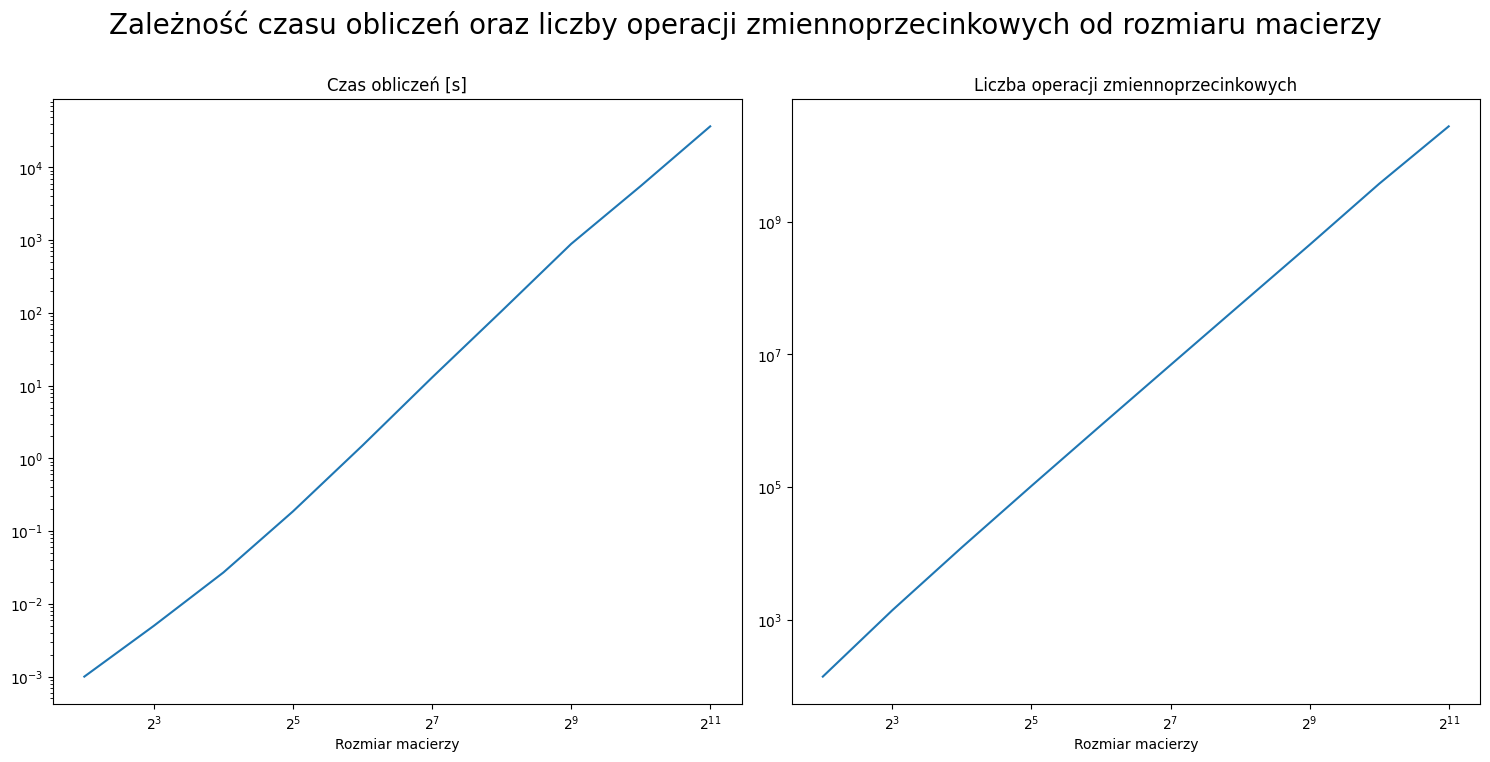

In [9]:
k = range(2, 12)

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(15, 7.5)
fig.set_tight_layout(tight='rect')
fig.suptitle("Zależność czasu obliczeń oraz liczby operacji zmiennoprzecinkowych od rozmiaru macierzy", fontsize=20, y=1.01)

ax1.plot(np.power(2, k), times)
ax1.set_title("Czas obliczeń [s]")
ax1.semilogx(base=2)
ax1.set_yscale("log")

ax2.plot(np.power(2, k), operations)
ax2.set_title("Liczba operacji zmiennoprzecinkowych")
ax2.semilogx(base=2)
ax2.set_yscale("log")

ax1.set_xlabel("Rozmiar macierzy")
ax2.set_xlabel("Rozmiar macierzy")

plt.show()

Wraz z wykładniczym (o podstawie 2) przyrostem rozmiaru macierzy, zarówno czas obliczeń, jak i liczba operacji wzrasta również wykładniczo (o podstawie 10). Na wykresie czasu obliczeń można zaobserwowac delikatne załamanie - dla rozmiaru macierzy = 2^4 może być ono spowodowane faktem, że algorytm został uruchomiony lokalnie, a procesor mógł zostać obciążony w tym czasie inną czynnością. Załamanie widoczne dla rozmiaru macierzy = 2^9 wynika ze zmiany algorytmu mnożenia.